In [2]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.colors import LinearSegmentedColormap
import pickle
import tools as tl
import vizCM as viz

import sklearn.metrics as sm

In [2]:
%matplotlib notebook

In [3]:
idx = 0
infolder = '../data/input/lfr/'
str_ = '0.1_1'
dataset = 'adj_'+str_+'.dat'#'adj_'+str(idx)+'.dat'
infile = infolder + dataset

df = pd.read_csv(infile,header=None)
df.head(n=4)

,0,1,2
0,344,308,1
1,344,309,1
2,344,59,1
3,344,373,1


In [33]:
# Reading the data and storing it as a graph G

In [34]:
A, B = tl.import_data(infolder + dataset, ego=0, alter=1, force_dense=True, header=None,delimiter=None)
G = nx.Graph(A[0])

../data/input/lfr/adj_0.1_1.dat shape: (4965, 3)


In [35]:
G = nx.Graph(A[0])

In [36]:
theta_gt = np.load(infolder + 'theta_gt_' + 'adj_'+str_ + '.npz')
print('loading',infolder + 'theta_gt_' + 'adj_'+str_ + '.npz')
algo = 'eta_nc'
print('loading','../data/output/lfr/theta_' + dataset.split('.dat')[0]+ algo + '.npz')

#theta_inf = np.load( '../data/output/lfr/theta_' + dataset.split('.dat')[0]+ algo + '.npz')
theta_inf = np.load( '../data/output/lfr/theta_adj_0.1_1eta_nc.npz')

loading ../data/input/lfr/theta_gt_adj_0.1_1.npz
loading ../data/output/lfr/theta_adj_0.1_1eta_nc.npz


In [22]:
?np.allclose

In [37]:
u = {}
u['gt'] = theta_gt['u']
assert np.allclose(u['gt'],theta_gt['v'])
u['crep'] = theta_inf['u']
assert np.allclose(u['crep'],theta_inf['v'])

### Recovering communities

In [38]:
vcm = viz.vizCM(G,{'crep':u['crep'],'gt':u['gt']})
vcm.set_node_attributes(vcm.G,algo='crep')
vcm.set_node_attributes(vcm.G,algo='gt')
G = nx.Graph(vcm.G)
assert len(list(nx.isolates(G))) == 0

crep 17 17
P before: [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
P after: [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [39]:
results = open('../../results/networks/lfr_n_500_original/lfr_nets_dict.pkl',"rb")
lfr_graphs = pickle.load(results)
a=0.1
rseed = 1
G = lfr_graphs[str(a)][str(rseed)]
nodes = list(G.nodes())
nodes.sort()

pos = nx.get_node_attributes(G,'pos')

filename = '../data/input/lfr/graphs_LFR_0.1.pkl'
infile = open(filename,'rb')
Gs = pickle.load(infile)
infile.close()
G = Gs[idx]

nodes = list(G.nodes())
nodes.sort()

pos = nx.get_node_attributes(G,'pos')

### F1

In [40]:
u_norm = viz.normalize_nonzero_membership(vcm.U['crep'])
tl.evalu(u_norm,vcm.U['gt'])


0.743

### CS

In [41]:
tl.cosine_similarity(u_norm,vcm.U['gt'])[1]

0.830448958145726

### ARI

In [42]:
sm.adjusted_rand_score(np.argmax(vcm.U['gt'], axis=1), np.argmax(u_norm, axis=1) )         

0.7998498599055242

### Plot

In [43]:
K = u['gt'].shape[1]
from_list = LinearSegmentedColormap.from_list
cmax = K+1
cm = from_list('tab20', plt.cm.tab20(range(0,cmax)), cmax)
cmap = cm

<IPython.core.display.Javascript object>


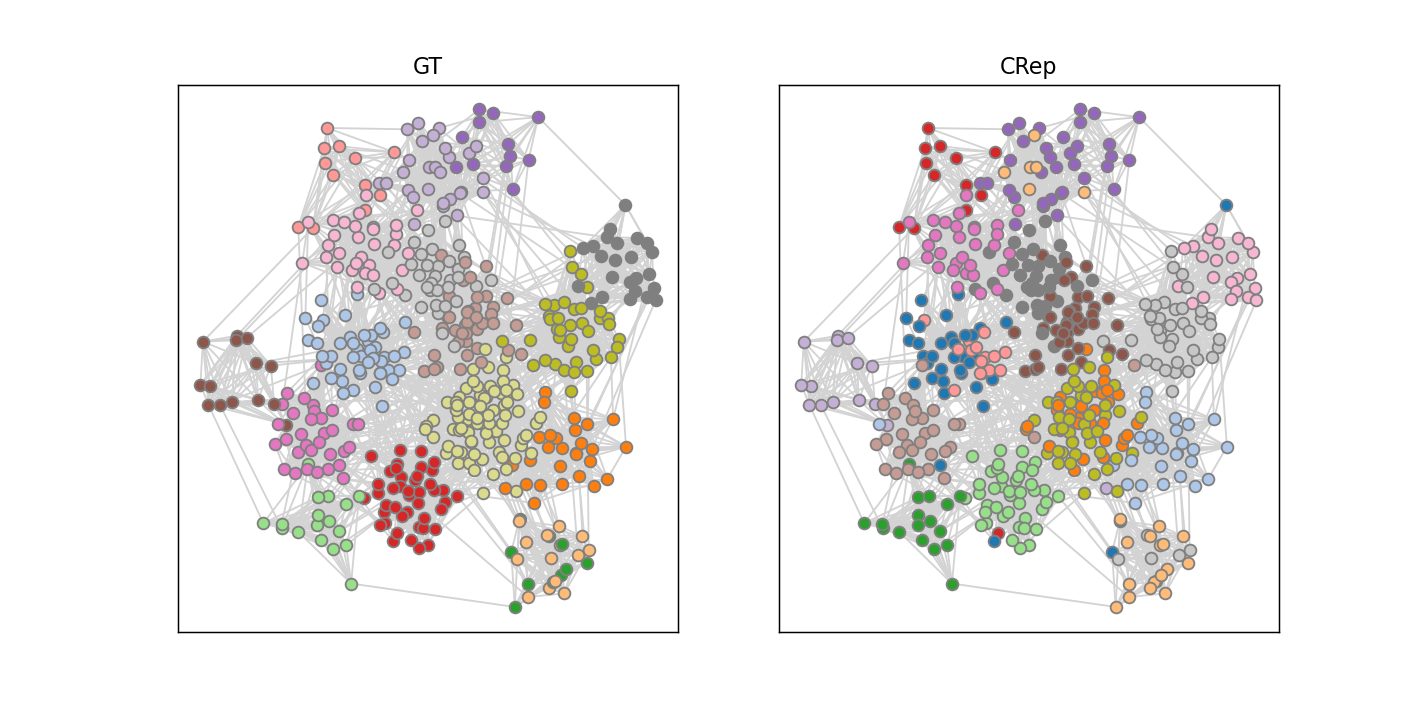

Text(0.5, 1.0, 'CRep')

In [44]:
figsize = (8,4)
plt.figure(figsize = figsize)
ns = 40
mrk = 'o'
edgecolor_node = 'grey'
edgecolor_edge = 'lightgrey'

plt.subplot(1,2,1)
nx.draw_networkx_edges(G, pos,arrows=False,edge_color=edgecolor_edge)
for n,d in G.nodes(data=True):
    nx.draw_networkx_nodes(G, pos, [n], node_size=ns, node_shape=mrk,node_color=[int(d['community'])],edgecolors=edgecolor_node,cmap=cmap,vmin=0,vmax=cmax)
plt.title('GT')

plt.subplot(1,2,2)
nx.draw_networkx_edges(G, pos,arrows=False,edge_color=edgecolor_edge)
for nid,n in enumerate(nodes):
    nx.draw_networkx_nodes(G, pos, [n], node_size=ns, node_shape=mrk,node_color=[np.argmax(vcm.U['crep'][nid])],edgecolors=edgecolor_node,cmap=cmap,vmin=0,vmax=cmax)
plt.title('CRep')